In [1]:
!pip install pytrends
!pip install pygooglenews --upgrade

Requirement already up-to-date: pygooglenews in /usr/local/lib/python3.7/dist-packages (0.1.2)


In [2]:
# importing important libraries
from pytrends.request import TrendReq
from pygooglenews import GoogleNews
import matplotlib.pyplot as plt
import re

In [3]:
# Connecting to the Google trends and choosing host language as english and timezone of US
trends = TrendReq(hl='es-US', tz=360)
# Select the key words to pull data from Google trends
key_word_list = ['Joe Biden', 'Dexamethasone']
# fetching the data as per abovve key words from last 5 years and for all types of categories
trends.build_payload(key_word_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [4]:
# Getting an interest frequency over the period of last 5 years
df = trends.interest_over_time()
df.head()

,Joe Biden,Dexamethasone,isPartial
date,,,
2016-05-15,0,0,False
2016-05-22,0,0,False
2016-05-29,0,0,False
2016-06-05,0,0,False
2016-06-12,0,0,False


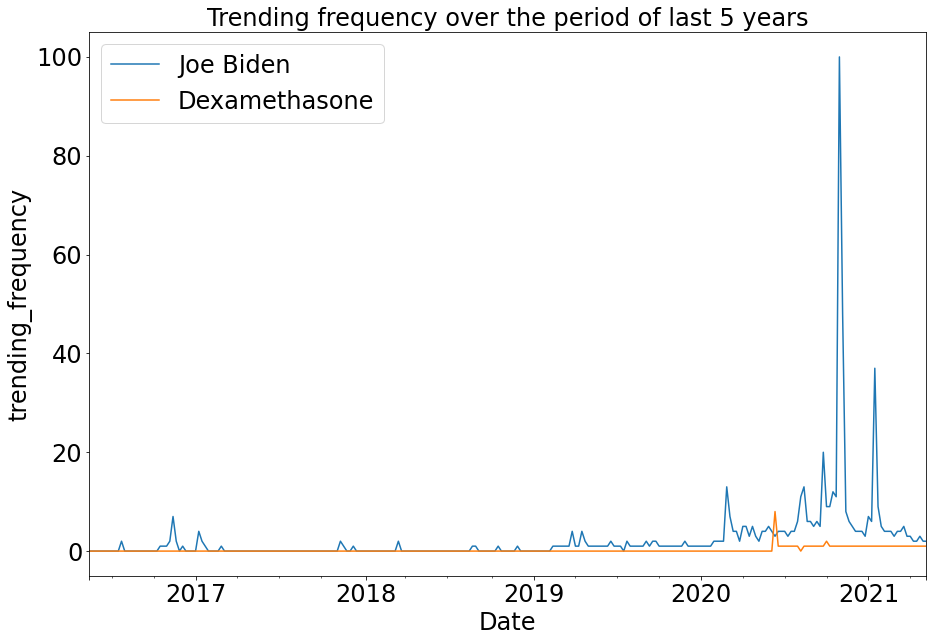

In [5]:
# Visualizing interest frequency over the period of last 5 years
ax1 = df.plot.line(figsize=(15,10),
                   fontsize = 24)
ax1.set_ylabel('trending_frequency', fontsize=24)
ax1.set_xlabel('Date', fontsize=24)
ax1.set_title('Trending frequency over the period of last 5 years', fontsize=24)
ax1.legend(loc=2, fontsize=24)
plt.show(block=True)

In [6]:
# import google news class
googlenews = GoogleNews()#'2020-05-01', '2020-07-01')

In [7]:
# getting the top news of last 3-4 days fron google news class
top_news = googlenews.top_news()
top_news

{'entries': [{'guidislink': False,
   'id': '52781589463203',
   'link': 'https://news.google.com/__i/rss/rd/articles/CBMiiAFodHRwczovL3d3dy51c2F0b2RheS5jb20vc3RvcnkvbW9uZXkvc2hvcHBpbmcvMjAyMS8wNS8xNC93YWxtYXJ0LW1hc2stcG9saWN5LXNhbXMtY2x1Yi1jZGMtbWFzay1ndWlkYW5jZS1jdXN0b21lcnMtZW1wbG95ZWVzLzUwOTg2MTAwMDEv0gEnaHR0cHM6Ly9hbXAudXNhdG9kYXkuY29tL2FtcC81MDk4NjEwMDAx?oc=5',
   'links': [{'href': 'https://news.google.com/__i/rss/rd/articles/CBMiiAFodHRwczovL3d3dy51c2F0b2RheS5jb20vc3RvcnkvbW9uZXkvc2hvcHBpbmcvMjAyMS8wNS8xNC93YWxtYXJ0LW1hc2stcG9saWN5LXNhbXMtY2x1Yi1jZGMtbWFzay1ndWlkYW5jZS1jdXN0b21lcnMtZW1wbG95ZWVzLzUwOTg2MTAwMDEv0gEnaHR0cHM6Ly9hbXAudXNhdG9kYXkuY29tL2FtcC81MDk4NjEwMDAx?oc=5',
     'rel': 'alternate',
     'type': 'text/html'}],
   'published': 'Fri, 14 May 2021 22:52:30 GMT',
   'published_parsed': time.struct_time(tm_year=2021, tm_mon=5, tm_mday=14, tm_hour=22, tm_min=52, tm_sec=30, tm_wday=4, tm_yday=134, tm_isdst=0),
   'source': {'href': 'https://www.usatoday.com', 'title': 'US

In [8]:
# total number of entries present in top news
n = len(top_news['entries'])

for i in range(n):

    # for each entry, getting all the sub articles
    # total number of sub articles for each entry
    m = len(top_news['entries'][i]['sub_articles'])

    for j in range(m):

        # title of each sub article
        title = top_news['entries'][i]['sub_articles'][j]['title']

        # removing all the charachters from above title
        title = re.sub("[^A-Za-z]"," ",title)

        # changing all the words to lowercase
        title = title.lower()

        # converting above title to the list of each word present in the list
        title_list = title.split()

        # cheking if joe or biden present in the above title list
        if 'joe' in title_list or 'biden' in title_list:
           
           # getting title of such news
           news_title = top_news['entries'][i]['sub_articles'][j]['title']
           print(news_title)

           # getting published date of above news
           published_date = top_news['entries'][i]['published']
           print(published_date)

           # getting url of that news
           url = top_news['entries'][i]['sub_articles'][j]['url']
           print(url)
           print()

           
       

Walmart, Trader Joe's and Costco say vaccinated customers don't have to wear masks in stores
Fri, 14 May 2021 22:52:30 GMT
https://news.google.com/__i/rss/rd/articles/CBMiTGh0dHBzOi8vd3d3LmNubi5jb20vMjAyMS8wNS8xNC9idXNpbmVzcy90cmFkZXItam9lcy1tYXNrLWd1aWRhbmNlL2luZGV4Lmh0bWzSAVBodHRwczovL2FtcC5jbm4uY29tL2Nubi8yMDIxLzA1LzE0L2J1c2luZXNzL3RyYWRlci1qb2VzLW1hc2stZ3VpZGFuY2UvaW5kZXguaHRtbA?oc=5

Biden Dissolves Controversial Trump Orders On Race And Culture
Fri, 14 May 2021 22:12:26 GMT
https://news.google.com/__i/rss/rd/articles/CBMiZ2h0dHBzOi8vd3d3Lm5wci5vcmcvMjAyMS8wNS8xNC85OTcwMTA2MTkvYmlkZW4tZGlzc29sdmVzLWNvbnRyb3ZlcnNpYWwtdHJ1bXAtb3JkZXJzLW9uLXJhY2UtYW5kLWN1bHR1cmXSAQA?oc=5

Biden cancels Trump's planned 'Garden of American Heroes'
Fri, 14 May 2021 22:12:26 GMT
https://news.google.com/__i/rss/rd/articles/CBMiSWh0dHBzOi8vbmV3cy55YWhvby5jb20vYmlkZW4tY2FuY2Vscy10cnVtcHMtcGxhbm5lZC1nYXJkZW4tMjAyODAzMDc4Lmh0bWzSAVFodHRwczovL25ld3MueWFob28uY29tL2FtcGh0bWwvYmlkZW4tY2FuY2Vscy10cnVtcHMtcGxhbm5lZ